In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [30]:
df = pd.read_csv('scaler_clustering.csv')
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [31]:
df.shape

(205843, 7)

In [32]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [33]:
df.duplicated().sum()

0

In [34]:
df.isna().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [35]:
df.nunique().sort_values(ascending=False)

Unnamed: 0          205843
email_hash          153443
company_hash         37299
ctc                   3360
job_position          1016
orgyear                 77
ctc_updated_year         7
dtype: int64

In [36]:
# df[df['company_hash'].isna()]

In [37]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                     ',missing_data['Missing Value Count'].sum(),'      ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  205843
              Missing Value Count  Percentage
job_position                52564       25.54
orgyear                        86        0.04
company_hash                   44        0.02
Total                       52694        25.6


In [38]:
df.dropna(subset = ['orgyear'],inplace=True)
df['orgyear'].isna().sum()

0

In [39]:
df.dropna(subset = ['company_hash'],inplace=True)
df['company_hash'].isna().sum()

0

In [40]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                     ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  205713
              Missing Value Count  Percentage
job_position                52509       25.53
Total                       52509       25.53


In [41]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [42]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [43]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205713 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205713 non-null  object 
 1   email_hash        205713 non-null  object 
 2   orgyear           205713 non-null  float64
 3   ctc               205713 non-null  int64  
 4   job_position      153204 non-null  object 
 5   ctc_updated_year  205713 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [45]:
df[['orgyear','ctc_updated_year']] = df[['orgyear','ctc_updated_year']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205713 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      205713 non-null  object
 1   email_hash        205713 non-null  object
 2   orgyear           205713 non-null  int32 
 3   ctc               205713 non-null  int64 
 4   job_position      153204 non-null  object
 5   ctc_updated_year  205713 non-null  int32 
dtypes: int32(2), int64(1), object(3)
memory usage: 9.4+ MB


In [46]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019


In [47]:
df.nunique().sort_values(ascending=False)

email_hash          153333
company_hash         37274
ctc                   3359
job_position          1016
orgyear                 77
ctc_updated_year         7
dtype: int64

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205713.0,2.014882e+03,6.357789e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205713.0,2.271293e+06,1.180090e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205713.0,2.019628e+03,1.325133e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


In [49]:
df.describe(include=['object','category']).T

,count,unique,top,freq
company_hash,205713,37274,nvnv wgzohrnvzwj otqcxwto,8335
email_hash,205713,153333,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10
job_position,153204,1016,Backend Engineer,43540


In [50]:
df['ctc'].unique()

array([1100000,  449999, 2000000, ..., 5266000,  234000, 3327000],
      dtype=int64)

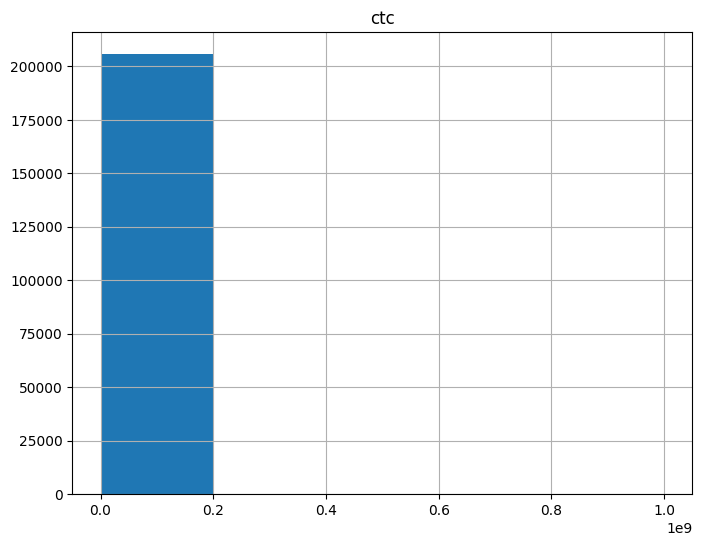

In [51]:
df.hist(column=['ctc'],bins = 5, figsize=(8,6))
plt.show()